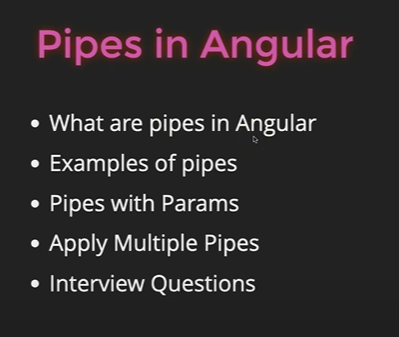

# **1. What are Pipes in Angular?**
Pipes are used to transform data in templates. They take in data as input and return transformed data.

Example: {{ name | uppercase }} converts name to uppercase in the view.



```
🔹 2. Examples of Pipes
Some common built-in pipes:

uppercase → {{ title | uppercase }}

lowercase → {{ title | lowercase }}

titlecase → {{ title | titlecase }}

date → {{ today | date:'fullDate' }}

currency → {{ price | currency:'INR' }}


```



# **app.html**



```
<h1>Pipes in Angular</h1>

<!-- String Pipes -->
<h2>{{ title }}</h2>                   <!-- Original -->
<h2>{{ title | uppercase }}</h2>      <!-- UPPERCASE -->
<h2>{{ title | lowercase }}</h2>      <!-- lowercase -->
<h2>{{ title | titlecase }}</h2>      <!-- Title Case -->

<!-- Date Pipes -->
<h2>{{ date | date }}</h2>                        <!-- Default format -->
<h2>{{ date | date:'fullDate' }}</h2>            <!-- Full date format -->
<h2>{{ date | date:'fullDate' | uppercase }}</h2> <!-- Full date in uppercase -->

<!-- Currency Pipes -->
<h2>{{ amount }}</h2>                            <!-- Raw number -->
<h2>{{ amount | currency }}</h2>                 <!-- Default currency (USD) -->
<h2>{{ amount | currency:'INR':'symbol' }}</h2>  <!-- Indian Rupee with symbol -->

```



# **app.ts**



```
import { Component } from '@angular/core';
import { CommonModule } from '@angular/common';
import { FormsModule } from '@angular/forms';

import { User } from './user/user'; // Ensure UserComponent is exported as standalone

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [CommonModule, FormsModule, User],
  templateUrl: './app.html',
  styleUrls: ['./app.css']
})
export class App {
  title = 'Angular pipes example';
  date = new Date();
  amount = 123456.78;
}


```



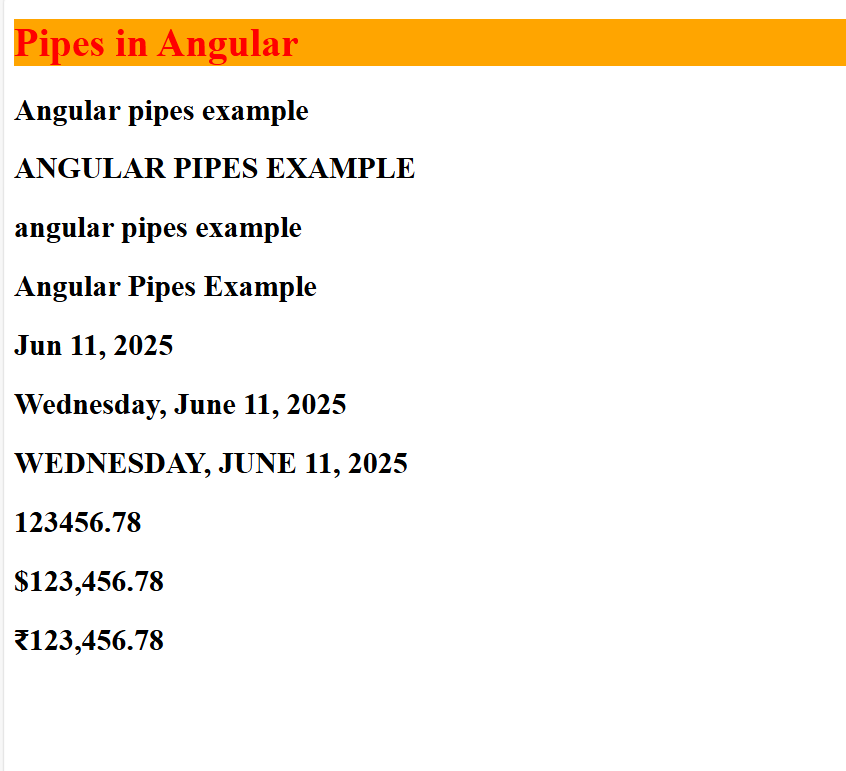

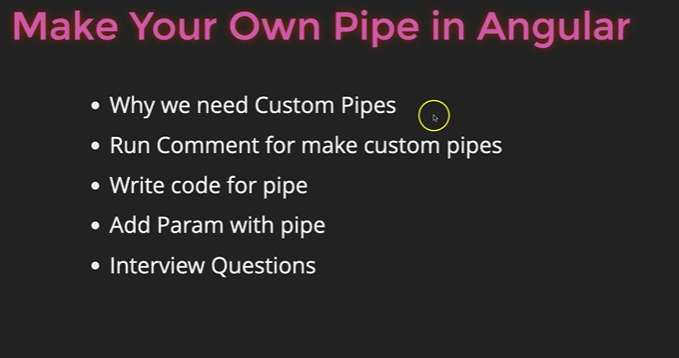

#**1. What is a Custom Pipe?**
A custom pipe lets you create your own data transformation logic for use in templates (like uppercase, currency, etc.).



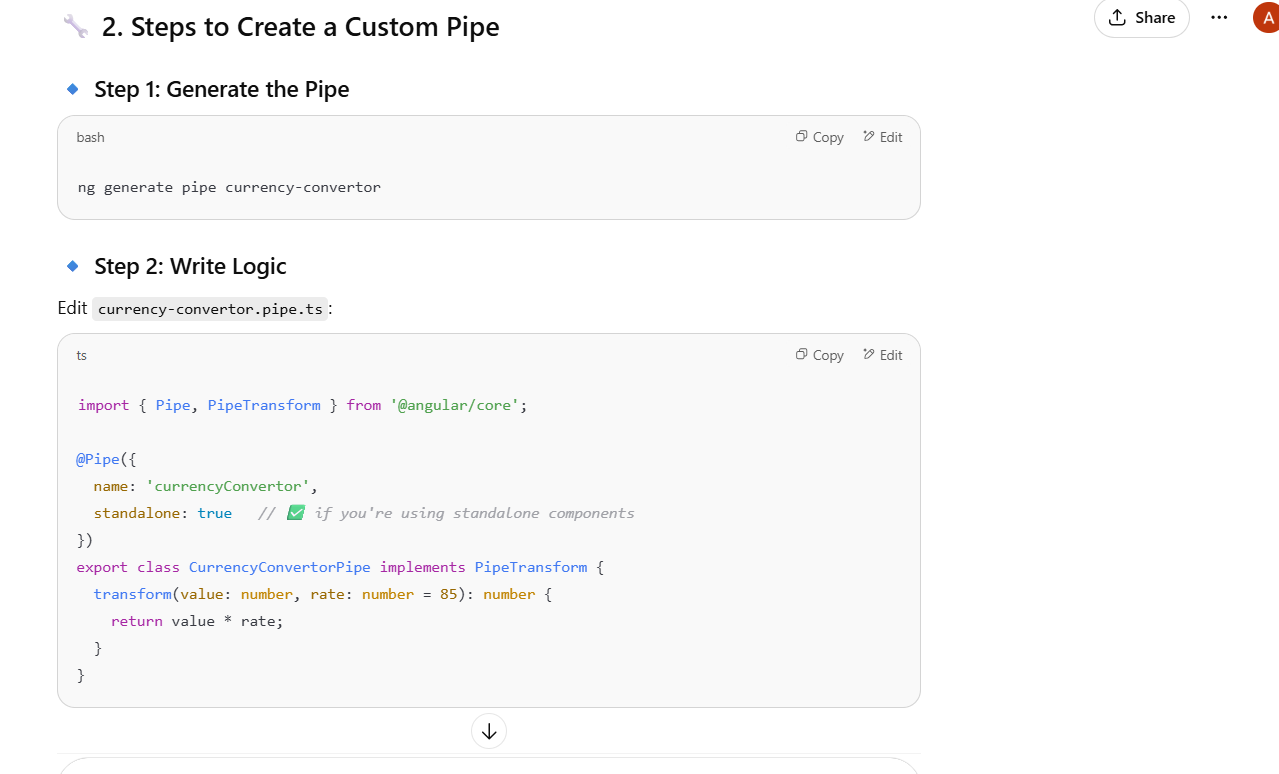

# **app.html**



```
<h1>Custom Pipe in Angular</h1>

<!-- Uses value from the component -->
<h2>{{ amount | currencyConvertor }}</h2>           <!-- amount = 10, default rate = 85 → 850 -->

<!-- Direct value with parameter -->
<h2>{{ 100 | currencyConvertor:12 }}</h2>           <!-- 100 × 12 = 1200 -->

<h2>{{ 100 | currencyConvertor:12 }}</h2>           <!-- Repeated: also 1200 -->

```



# **app.ts**



```
import { Component } from '@angular/core';
import { CommonModule } from '@angular/common';
import { FormsModule } from '@angular/forms';

import { User } from './user/user'; // ✅ Standalone component
import { CurrencyConvertorPipe } from './pipe/currency-convertor-pipe'; // ✅ Corrected path and class name

@Component({
  selector: 'app-root',
  standalone: true,
  imports: [
    CommonModule,
    FormsModule,
    User,
    CurrencyConvertorPipe  // ✅ Custom pipe used in template
  ],
  templateUrl: './app.html',
  styleUrls: ['./app.css']
})
export class App {
  amount = 10; // Amount to be converted using the pipe
}

```



# **curreny-convertor-pipes.ts**



```
import { Pipe, PipeTransform } from '@angular/core';

@Pipe({
  name: 'currencyConvertor'
})
export class CurrencyConvertorPipe implements PipeTransform {

  transform(value: number, ...args: number[]): unknown {
    console.log(args);
    let [rate] = args;

    if (rate) {
      return value * rate;    // Use provided conversion rate
    } else {
      return value * 85;      // Default conversion rate if none passed
    }
  }

}

```



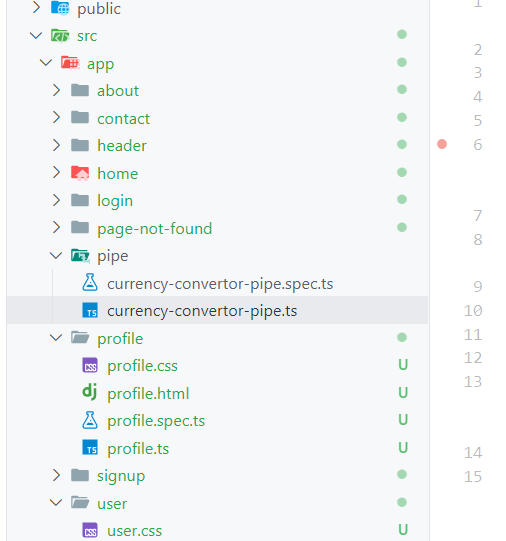

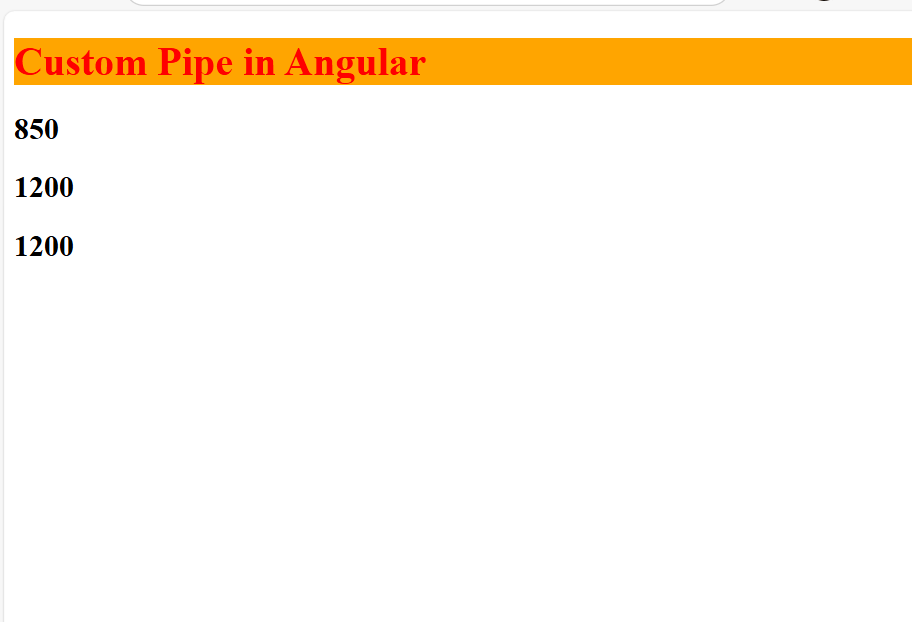

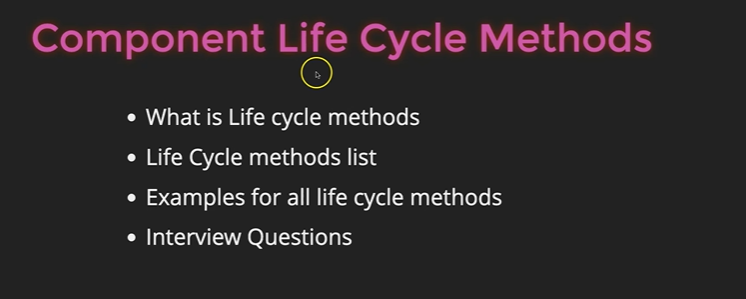

# **🔄 What is Life Cycle Methods?**
Life cycle methods are special functions/hooks that get called at specific stages of a component's existence—like when it's created, updated, or destroyed.


# **📋 Life Cycle Methods List (Example for Angular):**

ngOnChanges() – Called when any @Input() property changes.

ngOnInit() – Called once after the component's first display; good for initialization.

ngDoCheck() – Called during every change detection cycle.

ngAfterContentInit() – Called once after projecting external content into the component.

ngAfterContentChecked() – Called after every check of projected content.

ngAfterViewInit() – Called once after the component's view (and child views) has been initialized.

ngAfterViewChecked() – Called after every check of the component’s view and child views.

ngOnDestroy() – Called right before the component is destroyed (used for cleanup).



# **💡 Examples for All Life Cycle Methods**
Would include short code snippets showing how and when to use each method (e.g., initializing data in ngOnInit()).


# **app.ts**



```
import { Component } from '@angular/core';
import { CommonModule } from '@angular/common';
import { FormsModule } from '@angular/forms';

import { User } from './user/user'; // ✅ Your standalone user component


// ✅ Correct: Use CommonModule which includes NgIf
@Component({
  selector: 'app-root',
  standalone: true,
  imports: [
    CommonModule,
    FormsModule,
    User
  ],
  templateUrl: './app.html',
  styleUrls: ['./app.css']
})
export class App {
  counter = 0;

  updateCounter() {
    this.counter++;
  }
}

```



# **app.html**



```
# This is formatted as code<h1>Life Cycle Methods in Angular</h1>

<!-- Button to increment the counter -->
<button (click)="updateCounter()">Count: {{ counter }}</button>

<!-- Show <app-user> only when counter is 5 -->
<div *ngIf="counter === 5">
  <app-user></app-user>
</div>
```



# **user.ts**



```
import { Component, OnInit } from '@angular/core';

@Component({
  selector: 'app-user',
  standalone: true,
  templateUrl: './user.html',
  styleUrls: ['./user.css'],
  imports: []
})
export class User implements OnInit {
  name: string = 'Anil';

  constructor() {
    console.log('constructor');
    this.name = 'ak';
  }

  ngOnInit(): void {
    console.log('ngOnInit');
    this.name = 'sk';
  }
}
```



# **user.html**



```
<h2>User Component</h2>
<p>Name: {{ name }}</p>

```



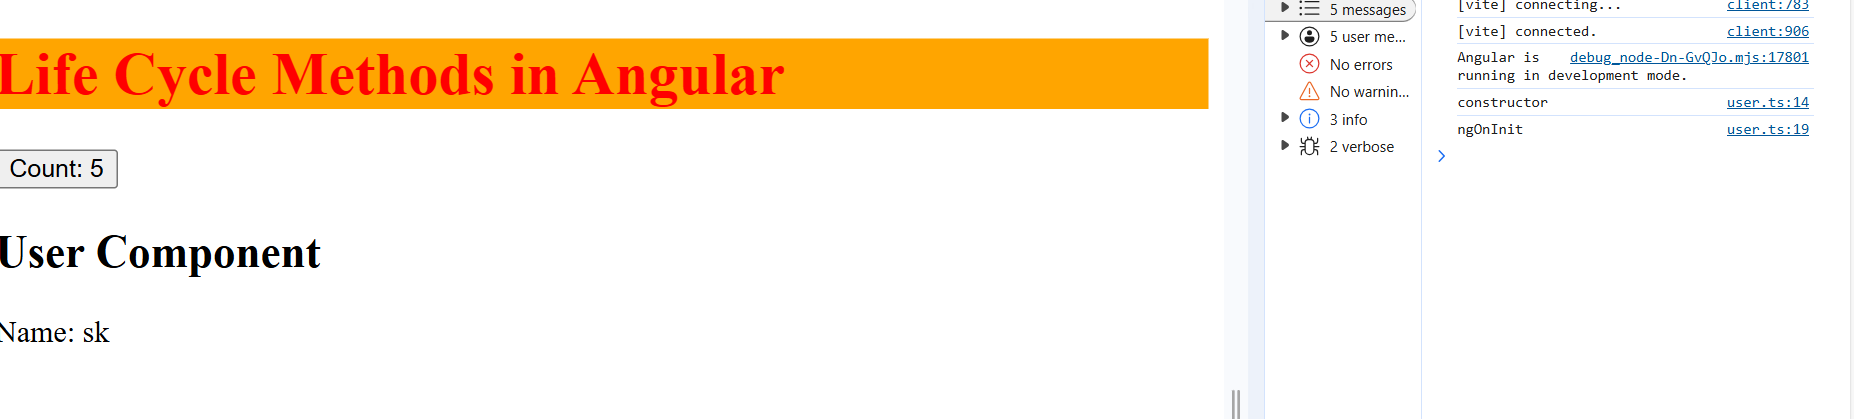